In [ ]:
# conda install -c conda-forge statsmodels
# pip install statsmodels
# https://worldhappiness.report/faq/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\rips\Desktop\Econometrics2022\EconometricsPractice2022\LinearRegression\World Happiness Report 2022.csv')

In [46]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [48]:
df.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

In [ ]:
# columns_with_null = df.columns[df.isna().any()].tolist()
# df[columns_with_null].info()
# df.describe(include='all')

In [50]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

C:\Users\rips\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dystopia (1.83) + residual'>

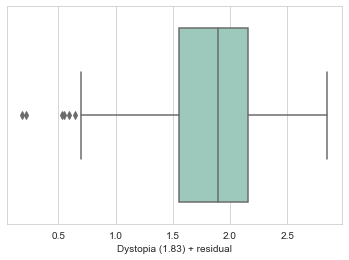

In [7]:
sns.boxplot(df['Dystopia (1.83) + residual'])

<AxesSubplot:xlabel='Happiness score', ylabel='Explained by: GDP per capita'>

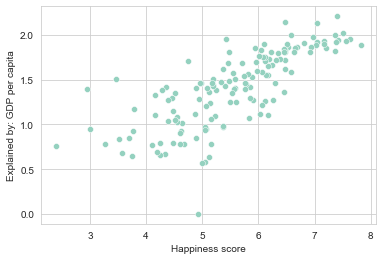

In [8]:
sns.scatterplot(data=df, x='Happiness score', y='Explained by: GDP per capita')

<AxesSubplot:xlabel='Explained by: GDP per capita', ylabel='Count'>

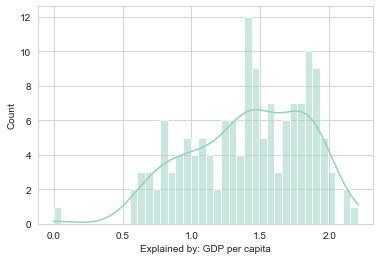

In [10]:
# A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins
sns.histplot(data=df, x='Explained by: GDP per capita', bins=40, kde=True)

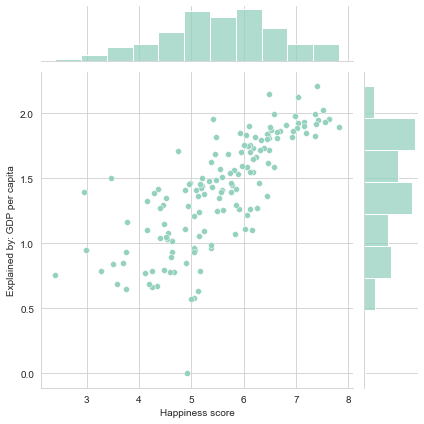

In [12]:
sns.jointplot(x='Happiness score', y='Explained by: GDP per capita', data=df)

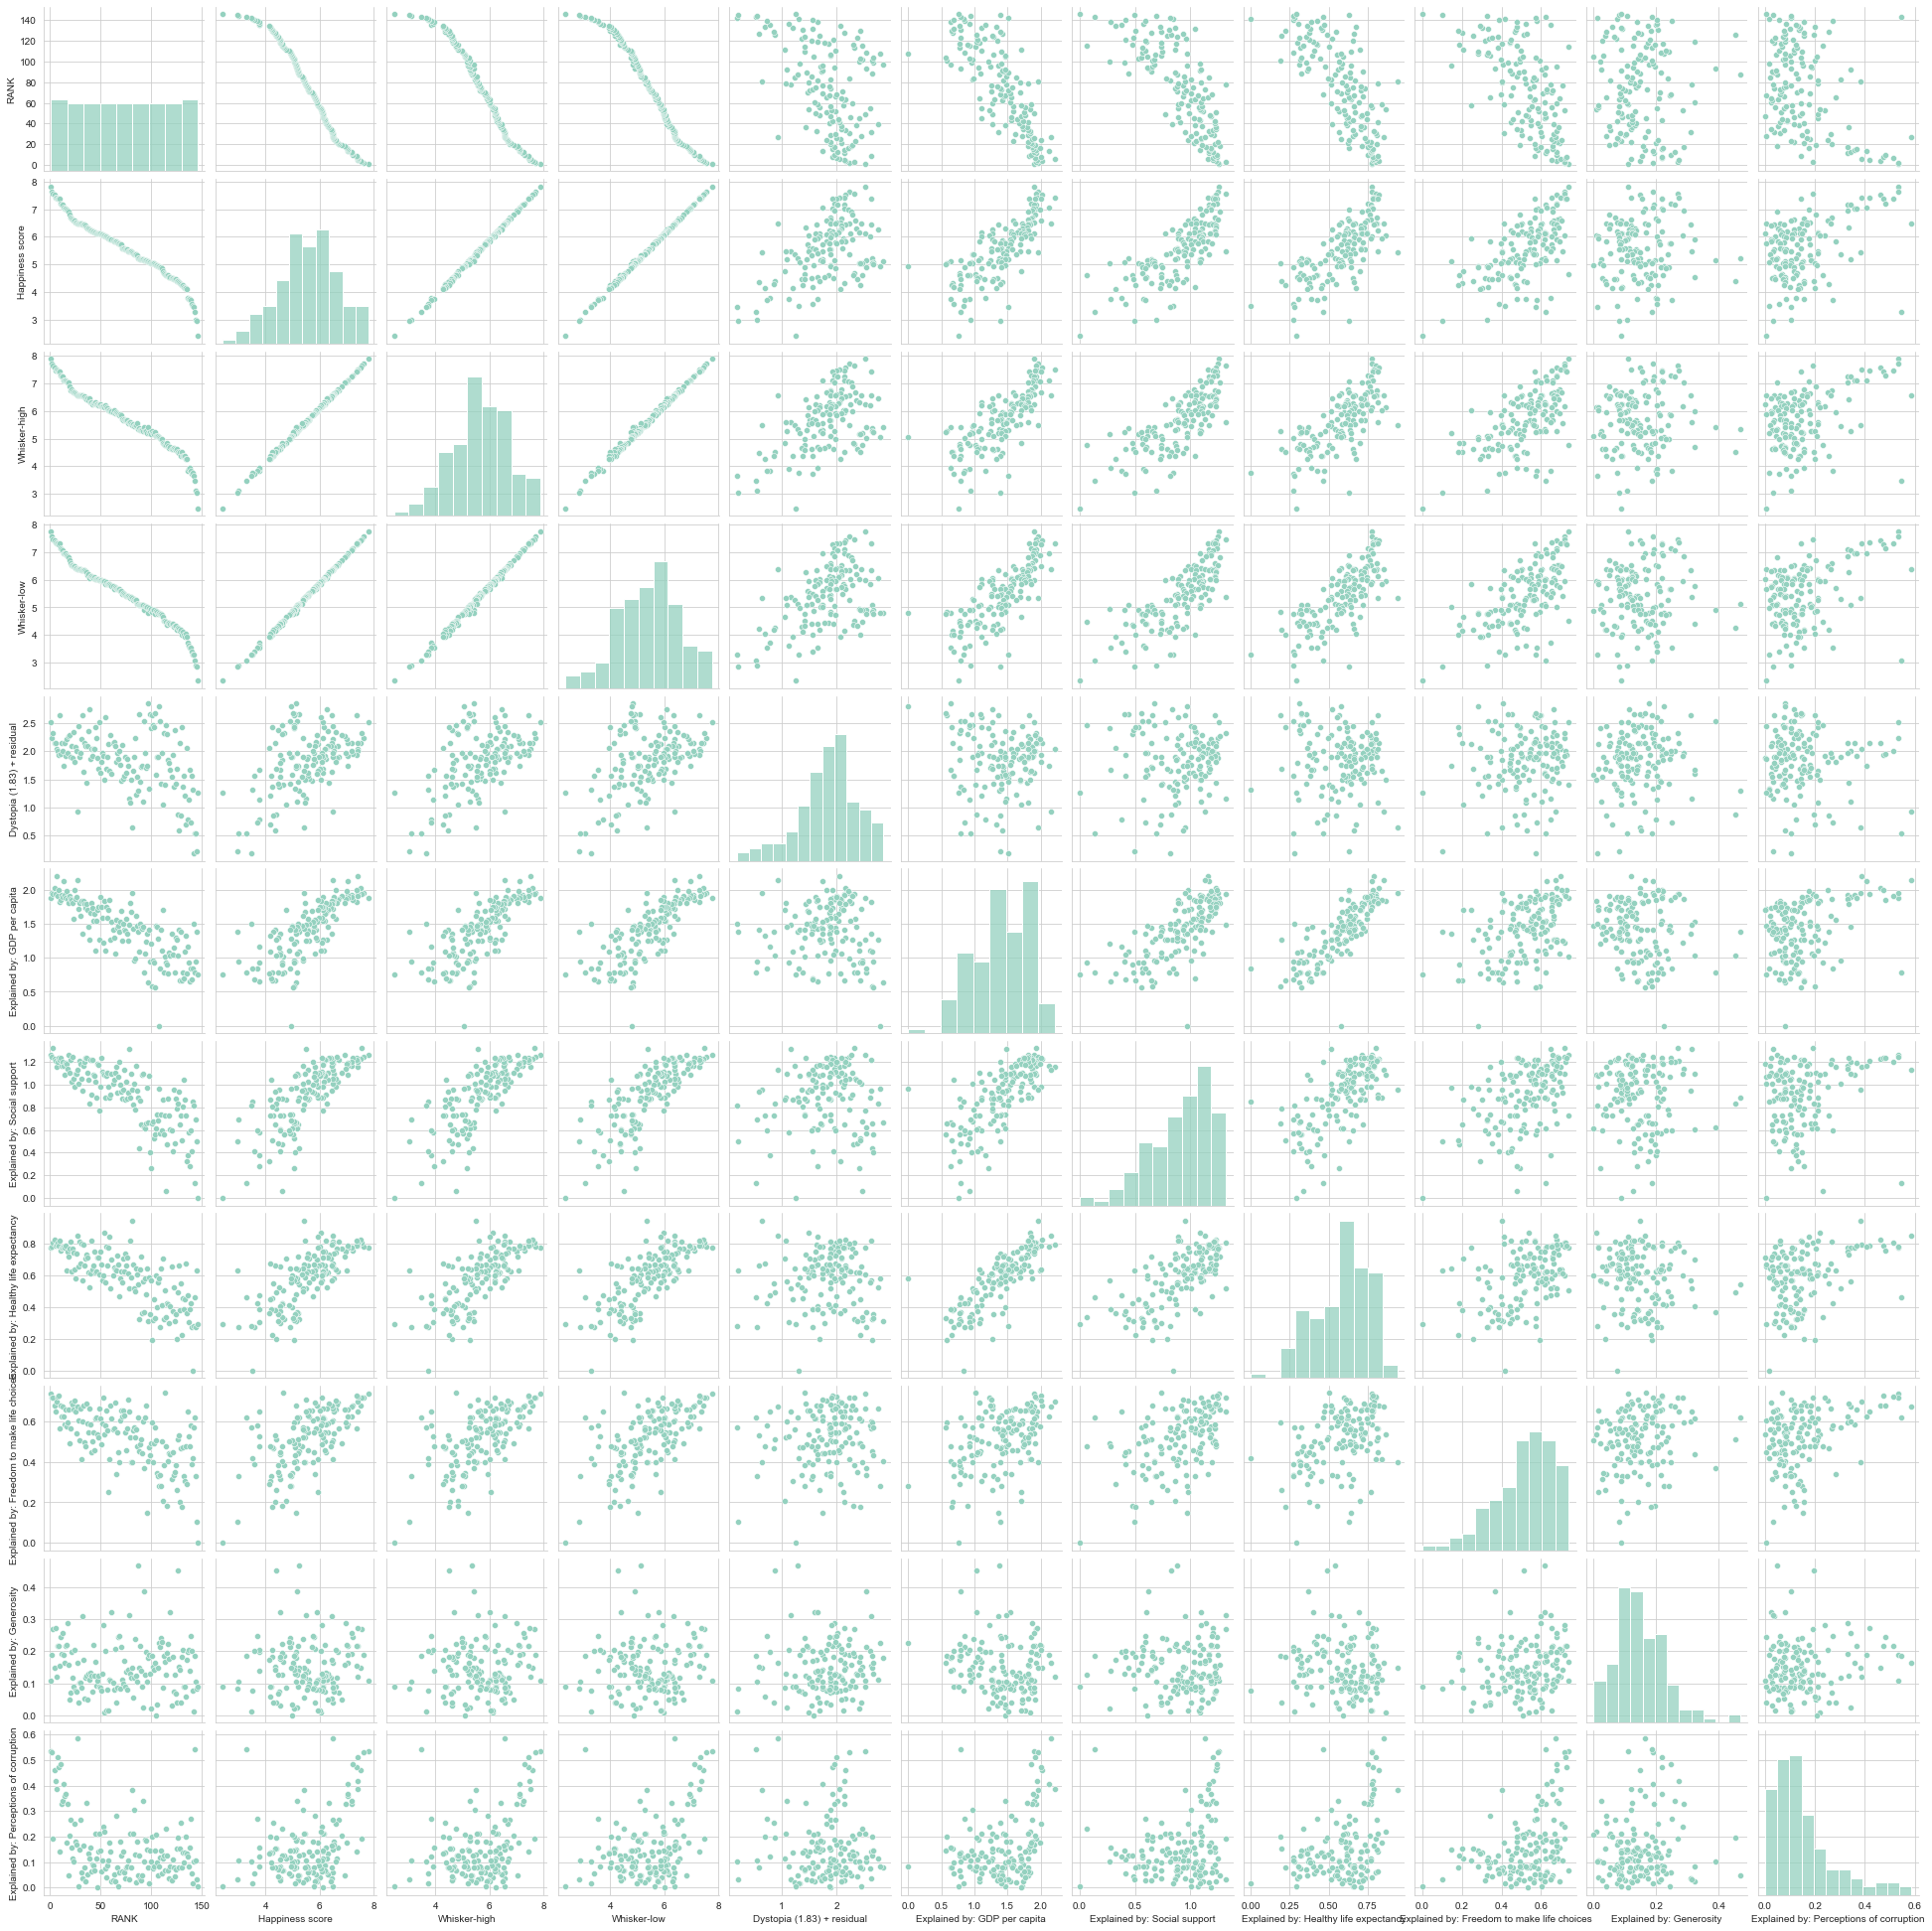

In [13]:
sns.pairplot(df)

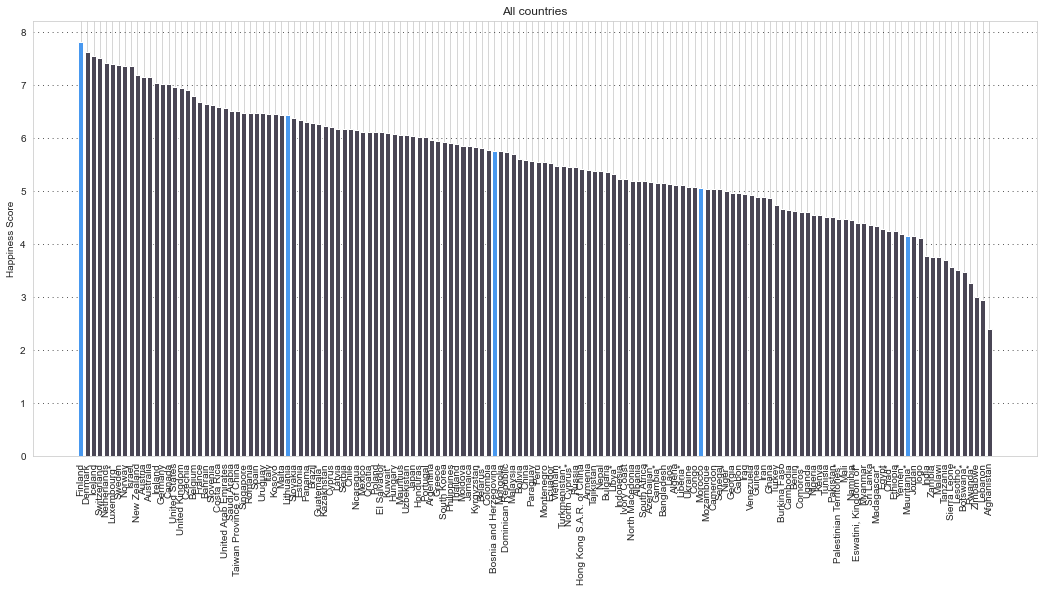

In [33]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
color_map = ["#4A4655" for _ in range(33)]
color_map[0] = "#4898EF"
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.bar(df["Country"], df['Happiness score'],color=color_map)
plt.ylabel("Happiness Score")
plt.title("All countries")
plt.show()


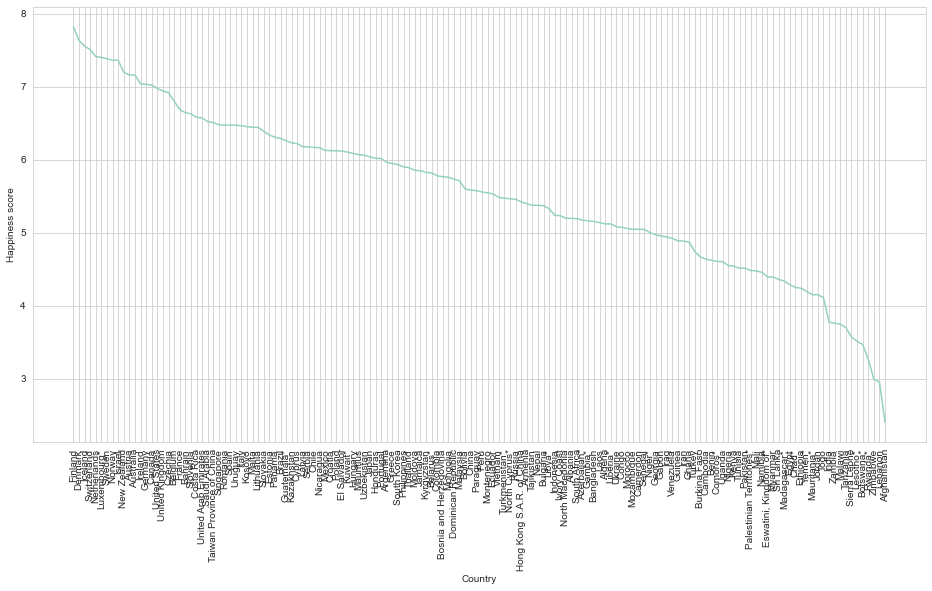

In [7]:
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
sns.lineplot(x="Country", y = "Happiness score", data = df)
plt.show()

In [14]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [12]:
df_5 = df.nlargest(5, 'Explained by: Healthy life expectancy') #df.nsmallest(n, column_name)
df_5

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
80,81,Hong Kong S.A.R. of China,5.425,5.501,5.348,0.642,1.957,0.954,0.942,0.400,0.147,0.383
53,54,Japan,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
26,27,Singapore,6.480,6.569,6.392,0.932,2.149,1.127,0.851,0.672,0.163,0.587
58,59,South Korea,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461


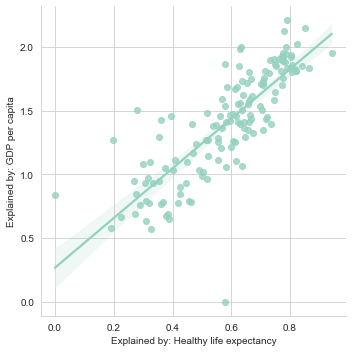

In [15]:
sns.lmplot(x='Explained by: Healthy life expectancy', y = 'Explained by: GDP per capita', data=df)

In [16]:
df.corr()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,1.000000,-0.980856,-0.978345,-0.982031,-0.444633,-0.792137,-0.773773,-0.750945,-0.623040,-0.032831,-0.403199
Happiness score,-0.980856,1.000000,0.999333,0.999383,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Whisker-high,-0.978345,0.999333,1.000000,0.997434,0.514099,0.752104,0.773375,0.727611,0.622934,0.065728,0.413718
Whisker-low,-0.982031,0.999383,0.997434,1.000000,0.483762,0.773844,0.781302,0.751530,0.625926,0.061820,0.418162
Dystopia (1.83) + residual,-0.444633,0.498990,0.514099,0.483762,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
Explained by: GDP per capita,-0.792137,0.763677,0.752104,0.773844,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Explained by: Social support,-0.773773,0.777889,0.773375,0.781302,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Explained by: Healthy life expectancy,-0.750945,0.740260,0.727611,0.751530,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Explained by: Freedom to make life choices,-0.623040,0.624822,0.622934,0.625926,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Explained by: Generosity,-0.032831,0.063785,0.065728,0.061820,0.066915,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107


Text(0.5, 1.0, 'Correlation Heatmap')

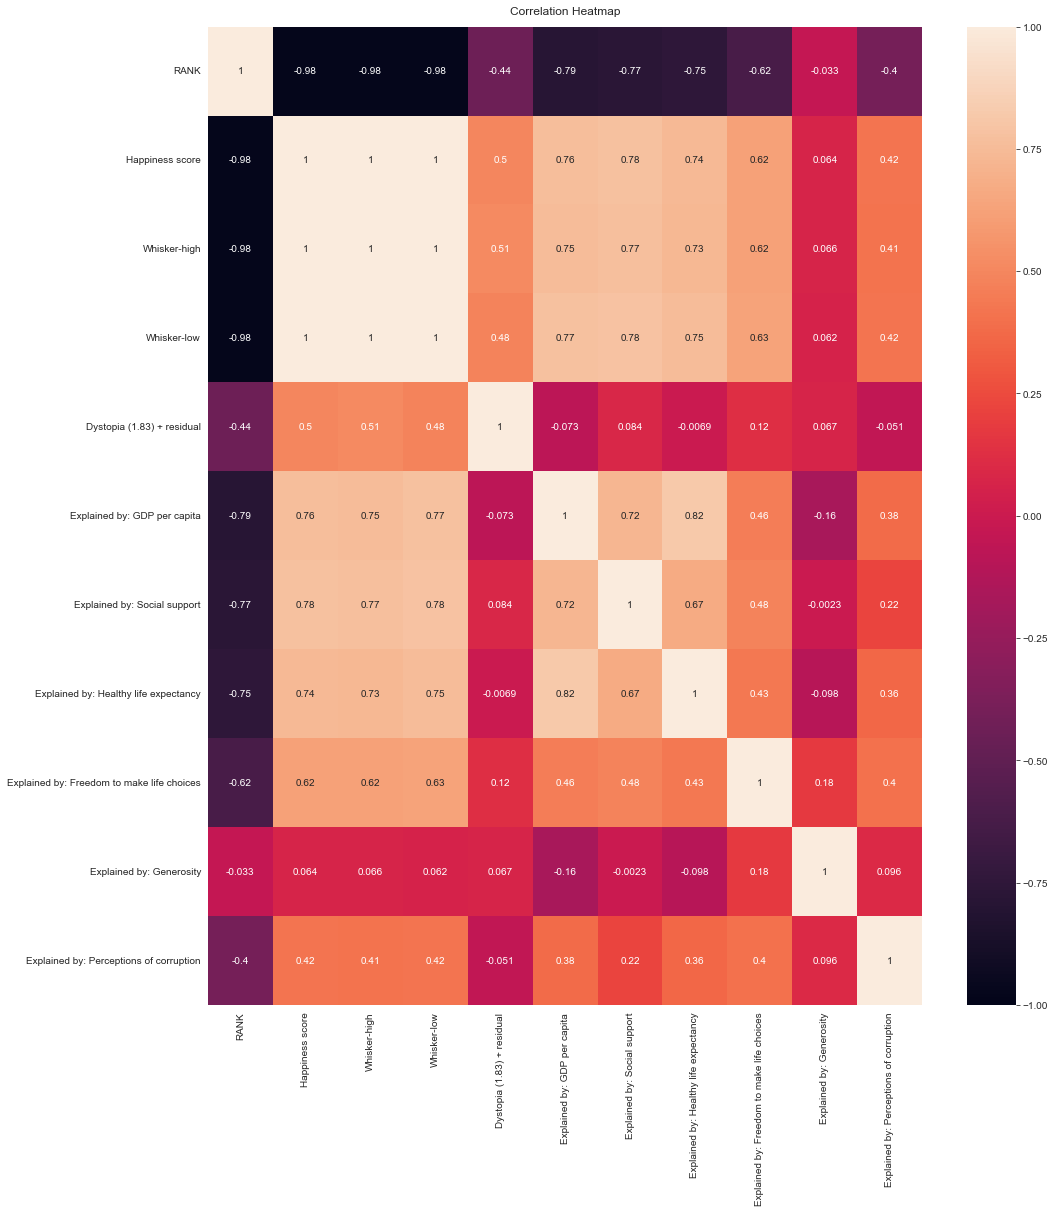

In [38]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

OLS stands for “ordinary least squares”, which means the algorithm finds the best fit line my minimizing the squared residuals (this is “least squares”). 
y = x_i*b_i + b_intercept
The point of linear regression: to use data to “learn” the parameters of the best-fit line and use the parameters to make predictions. The parameters of a line are its y-intercept and slope. Once we have the y-intercept and slope we can multiply them by the data in the X matrix to get a prediction for Y. 
 A fundamental assumption is that the residuals (or “errors”) are random: some big, some some small, some positive, some negative, but overall, the errors are normally distributed around a mean of zero. Anything other than normally distributed residuals indicates a serious problem with the linear model.


In [22]:
df.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [27]:
# df.drop(['RANK'], axis=1, inplace=True)
# y = df['Hapiness score']
# x = df['Explained by: GDP per capita'] #df[['col2'],['col2'] ]
# X = df.drop(['Hapiness score'])
# x = sm.add_constant(X)
# x.head() #y = b + k*x y, x, b'
y = df['Happiness score']
x = df[['Explained by: Social support',
        'Explained by: Healthy life expectancy',
        'Explained by: Freedom to make life choices']]

x = sm.add_constant(x)
x.head()

C:\Users\rips\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices
0,1.0,1.258,0.775,0.736
1,1.0,1.243,0.777,0.719
2,1.0,1.320,0.803,0.718
3,1.0,1.226,0.822,0.677
4,1.0,1.206,0.787,0.651


In [28]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness score   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.32e-42
Time:                        11:52:56   Log-Likelihood:                -117.50
No. Observations:                 146   AIC:                             243.0
Df Residuals:                     142   BIC:                             254.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7864      0.194      9.232      0.000       1.404       2.169
Explained by: Social support                   1.6164      0.228      7.098      0.000       1.166       2.067
Explained by: Healthy life expectancy          2.1133      0.352      6.004      0.000       1.417       2.809
Explained by: Freedom to make life choices     2.0576      0.362      5.690      0.000       1.343       2.772
==============================================================================
Omnibus:                        3.993   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.966
Skew:                          -0.364   Prob(JB):                        0.138
Kurtosis:                       2.650   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
result.params  # y = 185.56 - 79.45*x

const                                         1.786376
Explained by: Social support                  1.616352
Explained by: Healthy life expectancy         2.113307
Explained by: Freedom to make life choices    2.057602
dtype: float64

<AxesSubplot:ylabel='Count'>

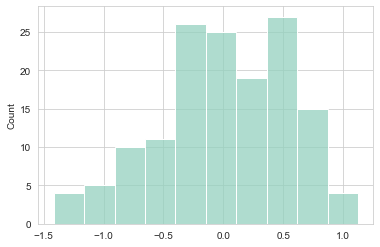

In [30]:
sns.histplot(result.resid) #sum(y - y*)^2 = errors

<AxesSubplot:>

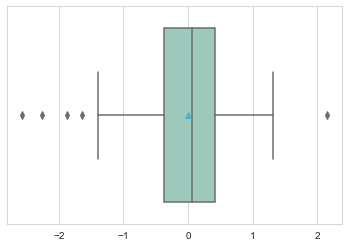

In [42]:
sns.boxplot(x=result.resid, showmeans=True)

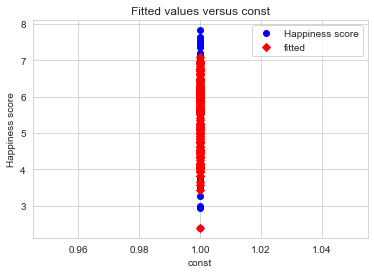

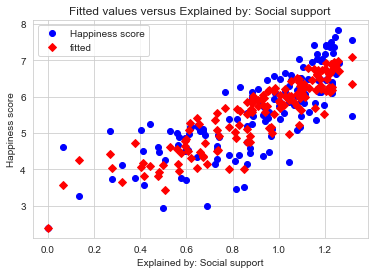

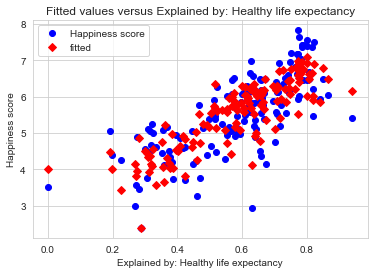

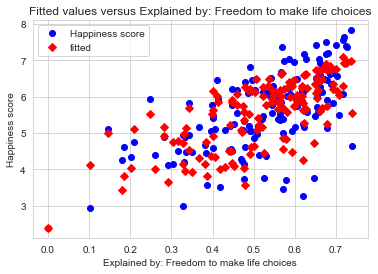

In [34]:
for i in range(4):
    sm.graphics.plot_fit(result, i, vlines=False)